# About Dataset

* This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
* The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset. * Several constraints were placed on the selection of these instances from a larger database.
* In particular, all patients here are females at least 21 years old of Pima Indian heritage.

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the dataset

In [2]:
data = pd.read_csv(r"C:\Users\Ashish Chauhan\MeriSKILL Task 1\diabetes.csv")
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# **Exploratory Data Analysis**

In [3]:
# Check the shape of dataset
data.shape

(768, 9)

In [4]:
# Check number of columns
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Check number of columns
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [6]:
# Check the type of data to decide what algorithm to use for training
data.info()

# Observation-
# All are numerical value so we will go for Linear Regression

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Descriptive Statistics of the Dataset
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### <u>Observation</u>-
* Min row shows zeros in several columns, which could indicate missing values or data entry errors, as some of these measurements (like Glucose, BloodPressure, SkinThickness, Insulin, and BMI) should logically not be zero.

### Handling Missing Value: Checking for NaN or Null values and handle missing values if any.

In [8]:
# Checking total null values in the overall dataset
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Check for rows with zero values
rows_with_zeros = data[(data == 0).any(axis=1)]

# Display the rows with zero values
print("Rows with zero values:")
print(rows_with_zeros)

Rows with zero values:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        

### Note-
* In this example, the (df == 0) part creates a boolean DataFrame where each element is True if the corresponding element in the original DataFrame is equal to zero and False otherwise.
* The any(axis=1) part checks if there is at least one True value along each row (axis=1).
* The result is a boolean Series, which is then used to index the original DataFrame, selecting only the rows where at least one element is zero.

### Solution -
* Result: The zero value in some columns does not make sense and may indicate missing values. In particular, the columns Glucose, BloodPressure, SkinThickness, Insulin, and BMI should not have zeros, as it would not be physiologically plausible (for example, a glucose or blood pressure measurement of zero). Therefore, these zeros should be replaced with NaN so that these "false non-missing values" are accounted for correctly

In [10]:
# Create a copy of the DataFrame to avoid modifying the original data
data_copy = data.copy(deep=True)

# Replace zeros with NaN in specific columns
cols_to_replace_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_copy[cols_to_replace_zeros] = data_copy[cols_to_replace_zeros].replace(0, np.nan)

# Check missing values again after replacement
print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### **Result:**
* The output shown is the result of calling the isnull().sum() function on a modified DataFrame that provides multiple NaN values ​​in each column.
* The results show that the columns "Blood Glucose", "Blood Pressure", "Skin Thickness", "Insulin" and "BMI" have varying numbers of NaN values, indicating that the zeros in these columns are considered missing or invalid and replaced by NaN .
* For example, "glucose" has 5 NaN values, "blood pressure" has 35, "skin thickness" has 227, "insulin" has 374, and "BMI" has 11. Other columns, such as "Pregnancy", "Diabetes Spectrum Function", "Age" and "Result" do not have NaN values, which means zeros are not replaced in these columns.

# **Data Visualization**-

<Axes: >

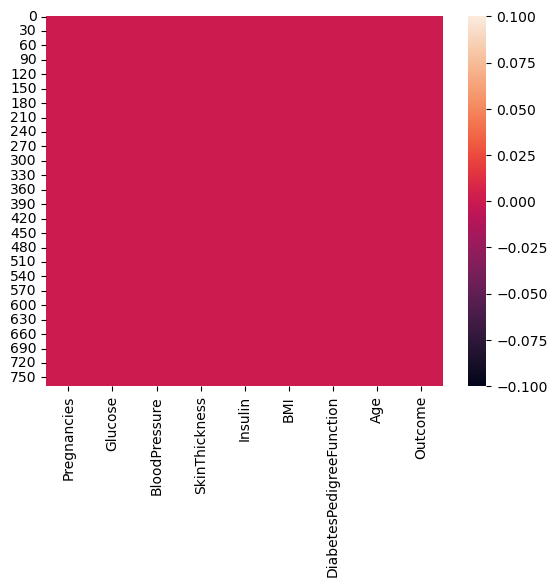

In [11]:
# Heatmap before replacement
sns.heatmap(data.isnull())

<Axes: >

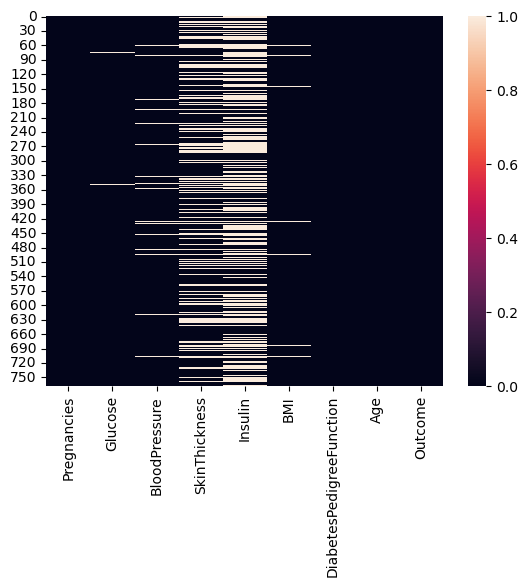

In [12]:
# Heatmap after replacement
sns.heatmap(data_copy.isnull())

**Comment**:
This heatmap visualizes missing data in a diabetes copy dataset, where warmer colors represent a higher frequency of NaN values. It shows significant missing data for 'Insulin' and 'SkinThickness', moderate for 'BloodPressure' and 'BMI', and minimal for 'Glucose'. The other features, 'Pregnancies', 'DiabetesPedigreeFunction', 'Age', and 'Outcome', show no missing data. This heatmap effectively highlights the areas in the dataset that may require imputation or further data cleansing

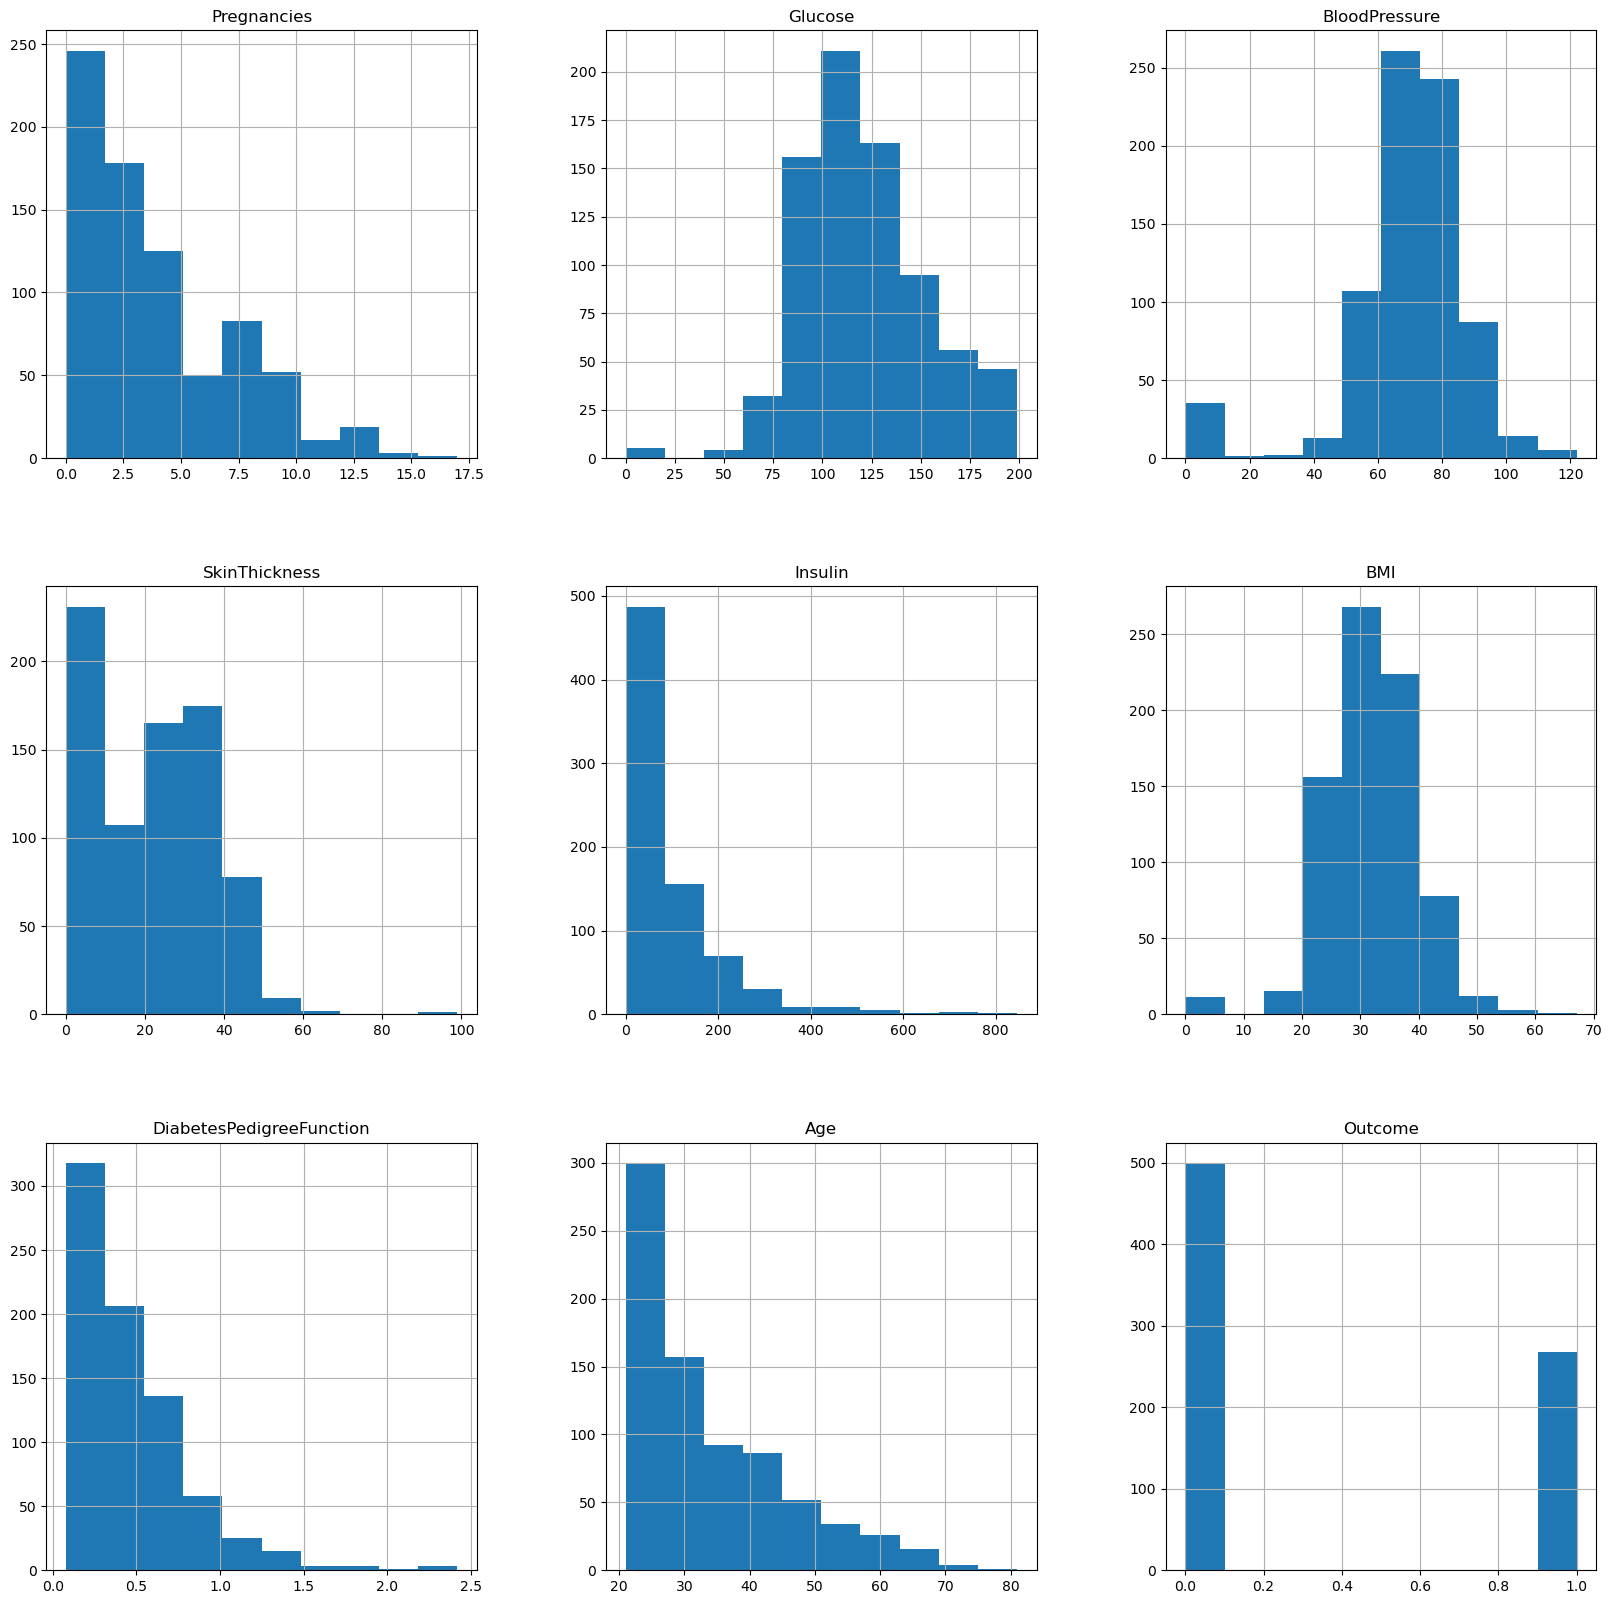

In [13]:
# Visualization the histograms before replacement
data.hist(figsize=(20,20))
plt.show()

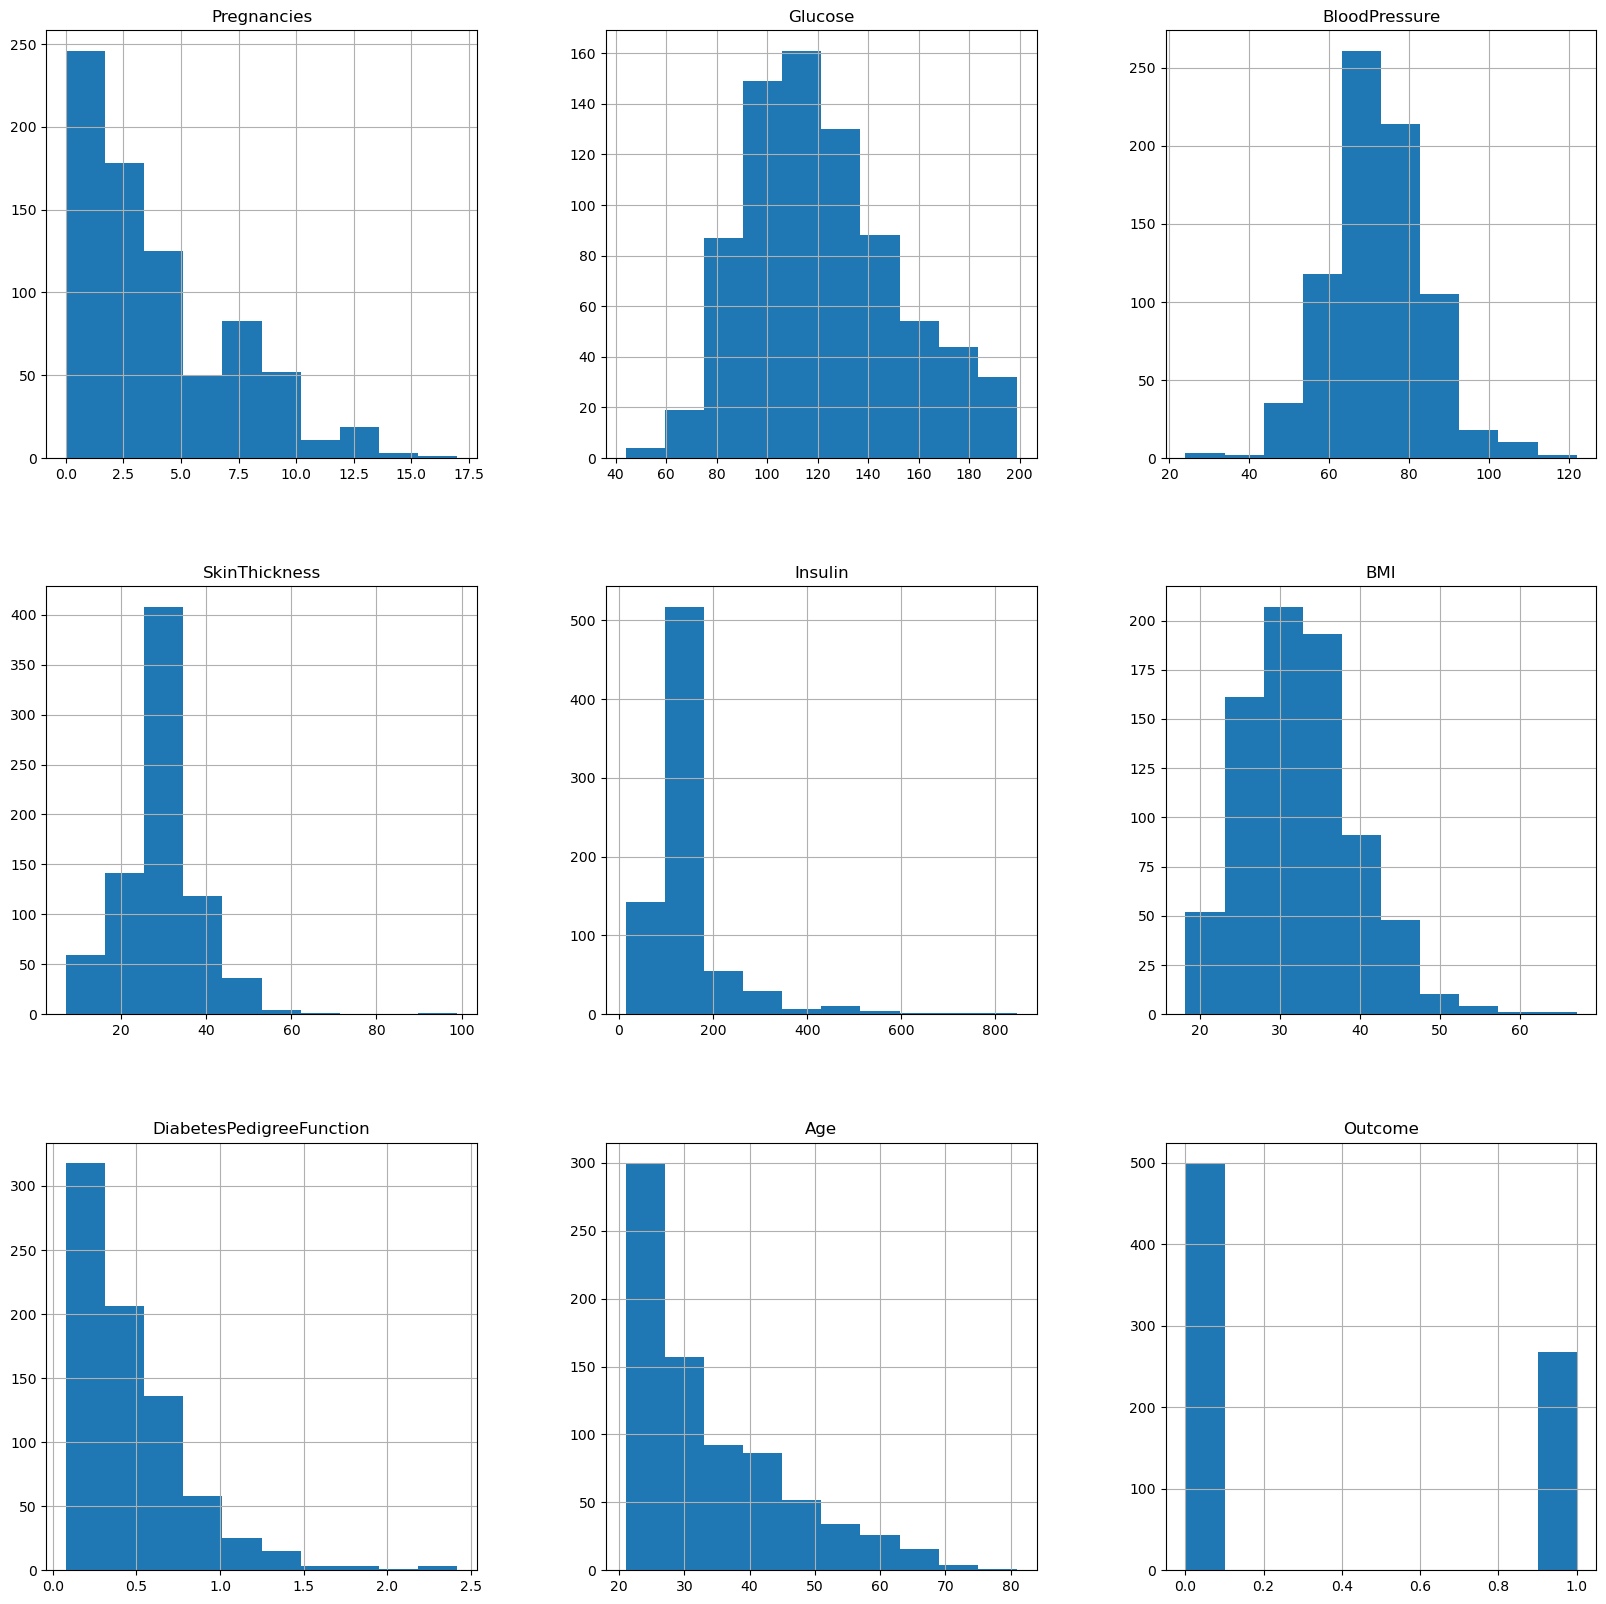

In [14]:
# Replace NaN values with the mean or median of the corresponding columns
# Replace with mean when the data is approximately normally distributed
# Replace with median when the data is skewed or contains outliers.
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace=True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace=True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace=True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace=True)
data_copy['BMI'].fillna(data_copy['BMI'].mean(), inplace=True)

# Visalization the histograms after replacement
p = data_copy.hist(figsize=(20,20))

**Result:**
- Most individuals have a low to moderate number of pregnancies.
- Glucose and blood pressure levels cluster around common values, indicating a normal distribution without extreme variations.
- Skin thickness and insulin levels show a rightward skew in their distribution, with a few individuals having significantly higher values than the majority.
- BMI values are predominantly on the higher side, suggesting a prevalence of overweight conditions in the studied population.
- The diabetes pedigree function, which reflects genetic risk, is generally low with a few higher cases distributed sporadically.
- The age distribution is mainly concentrated in the younger to middle-aged bracket, with fewer older individuals.
- There are more non-diabetic than diabetic cases in the dataset.

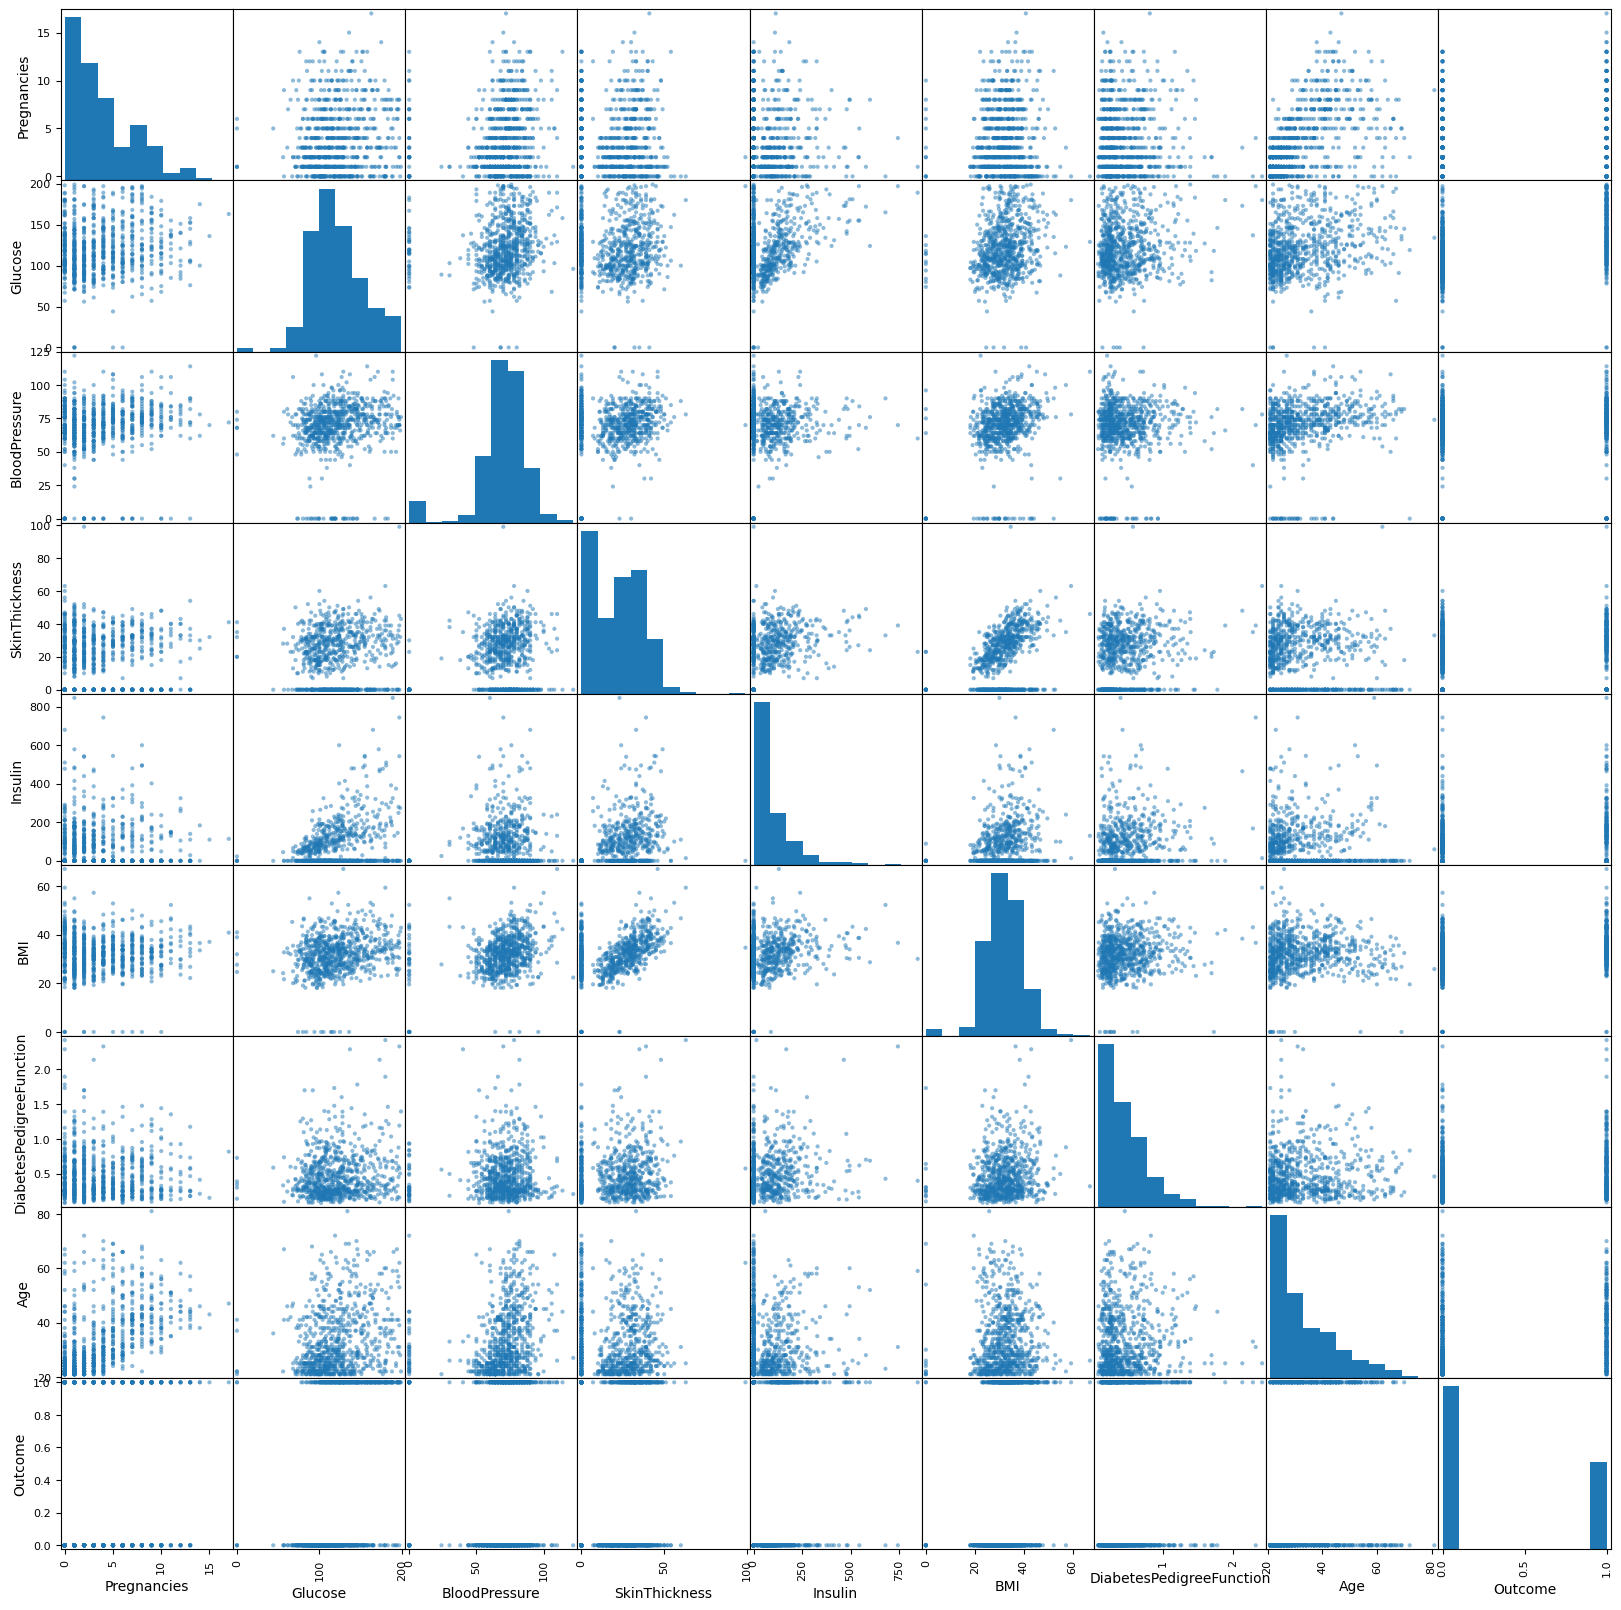

In [15]:
# Plot scatter matrix of uncleand data
P = scatter_matrix(data, figsize=(20,20))

C:\Users\Ashish Chauhan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

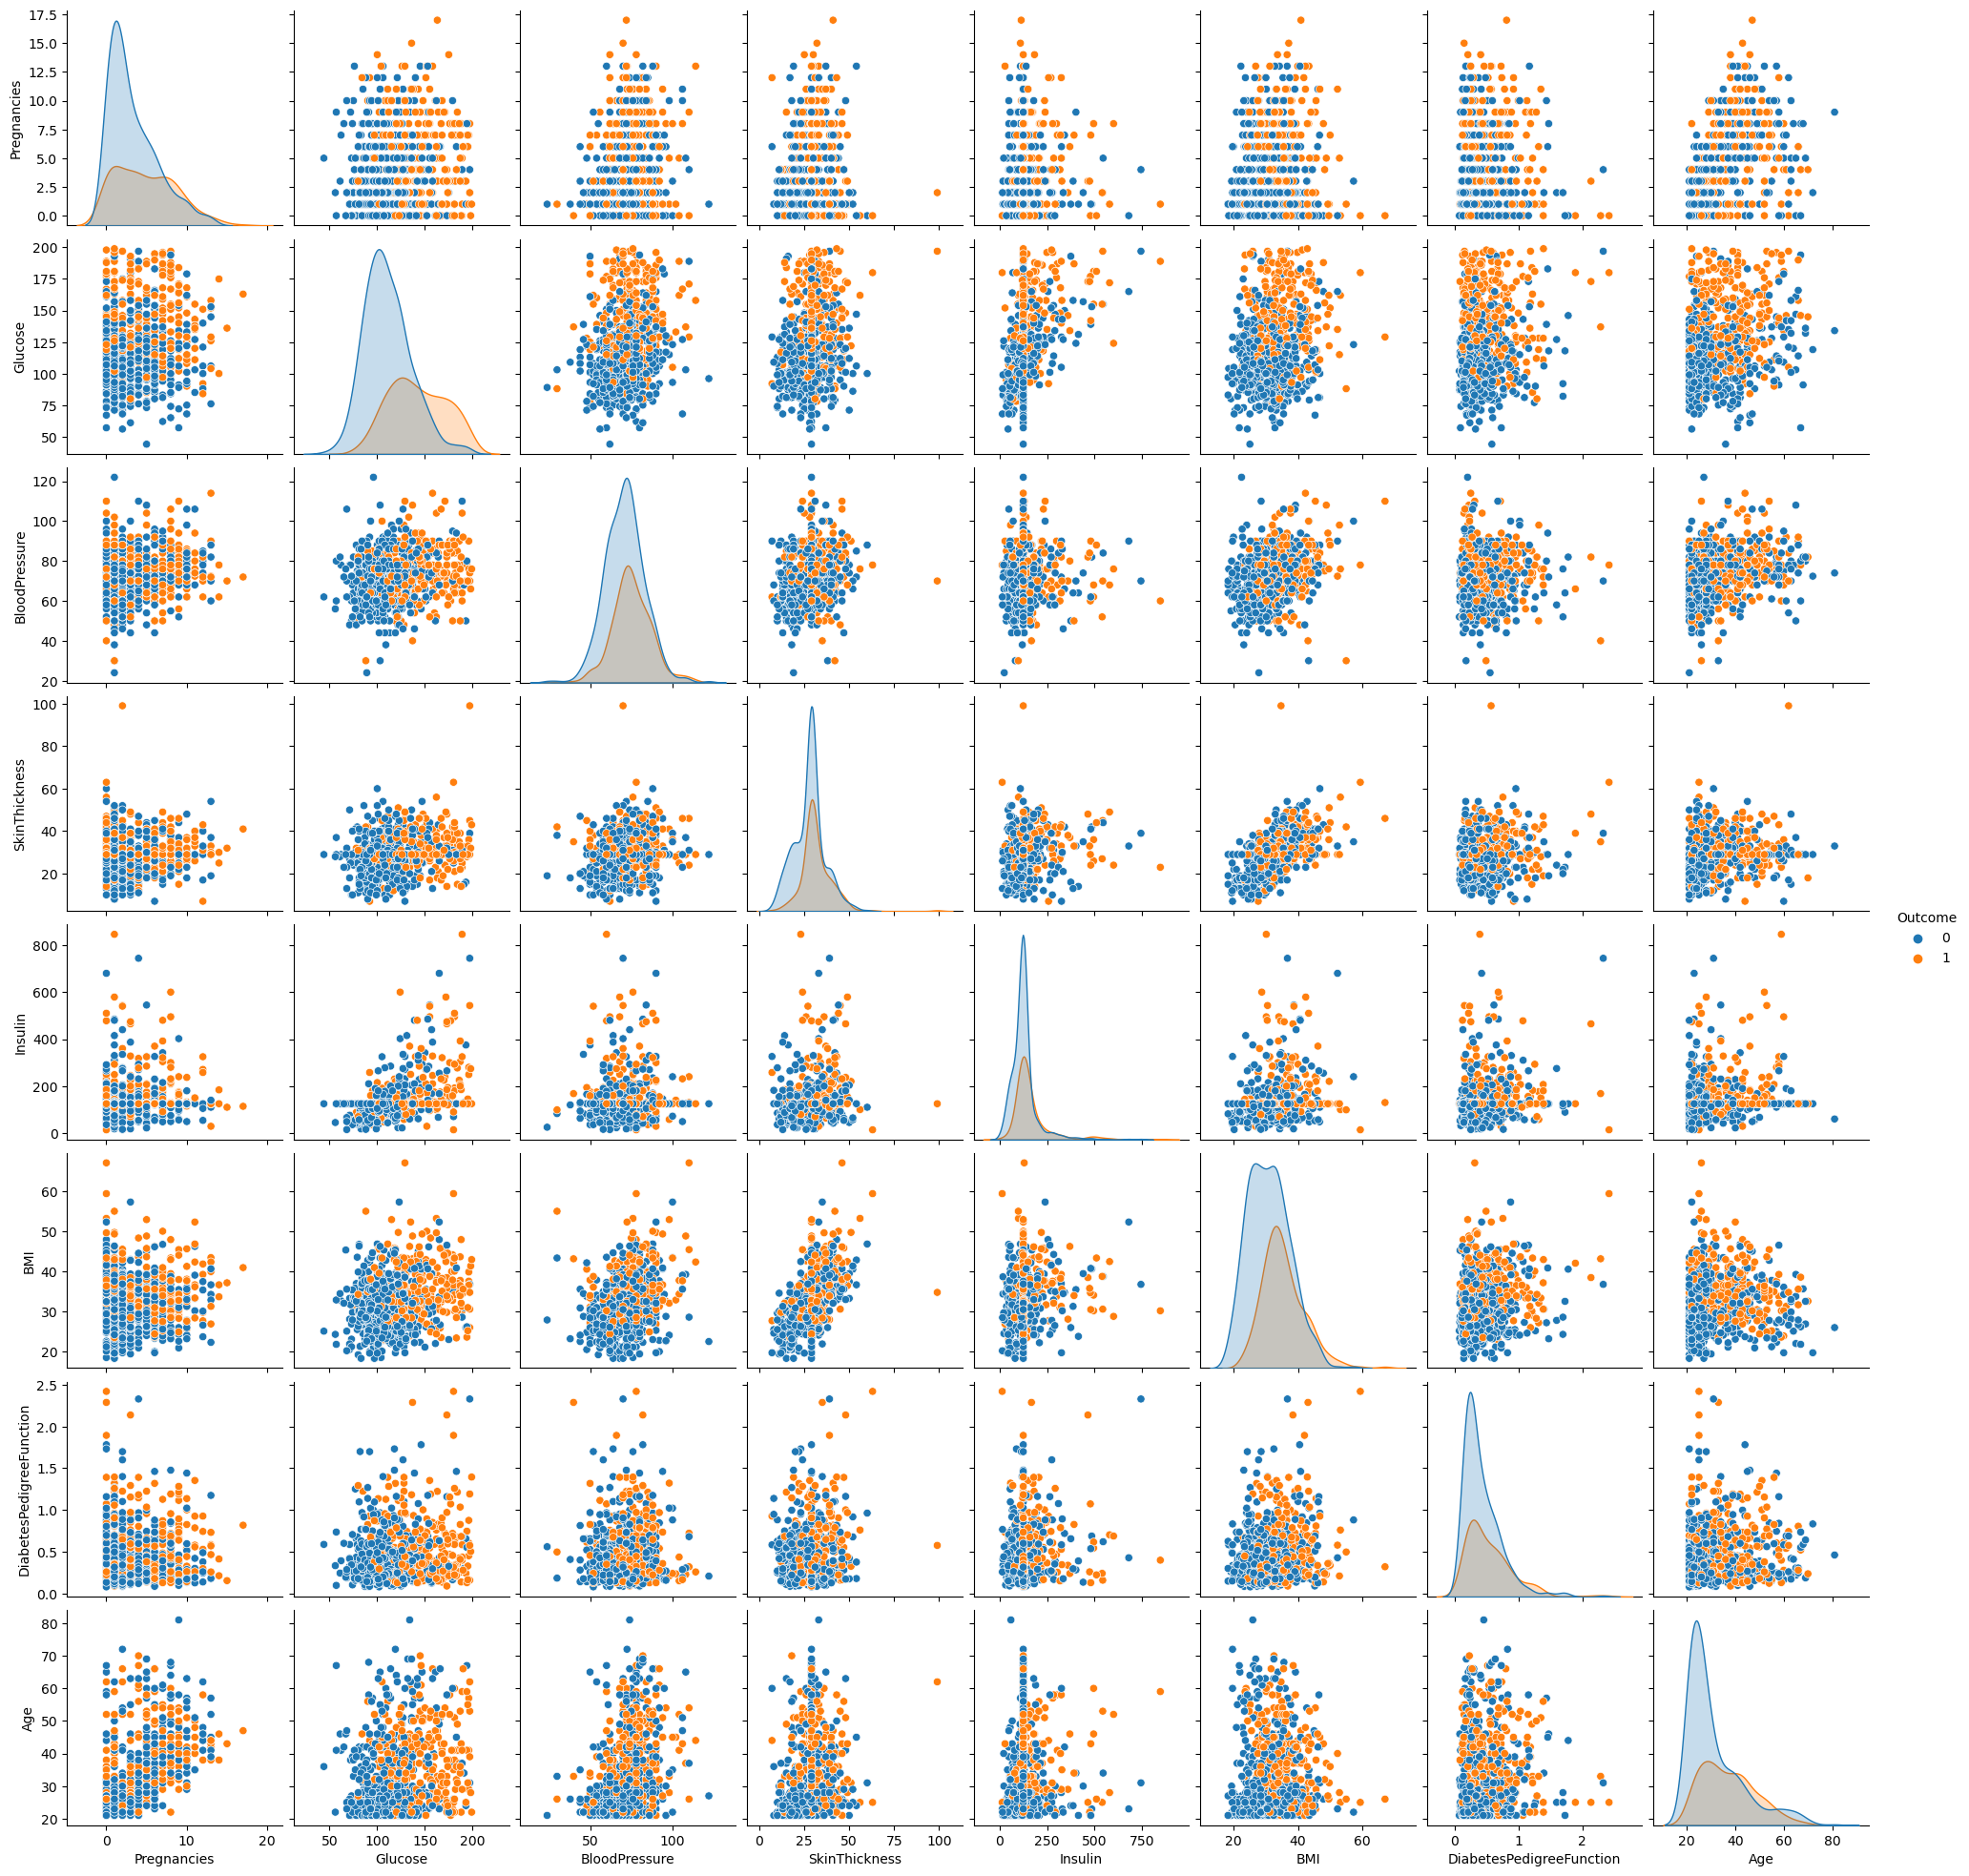

In [16]:
#plotting pair plots for the data
sns.pairplot(data_copy, hue='Outcome')
plt.show

**Result:**

1- High Glucose level in pregnancy increase the risk of diabete.

2- BMI Above 30 and high level of Glucose togather increase the risk of diabees.

3- We can see here that increasing Glucose level is the key factor which increase the risk of diaetes.

4- High Glucose level along with other variables increase the risk of diabetes.

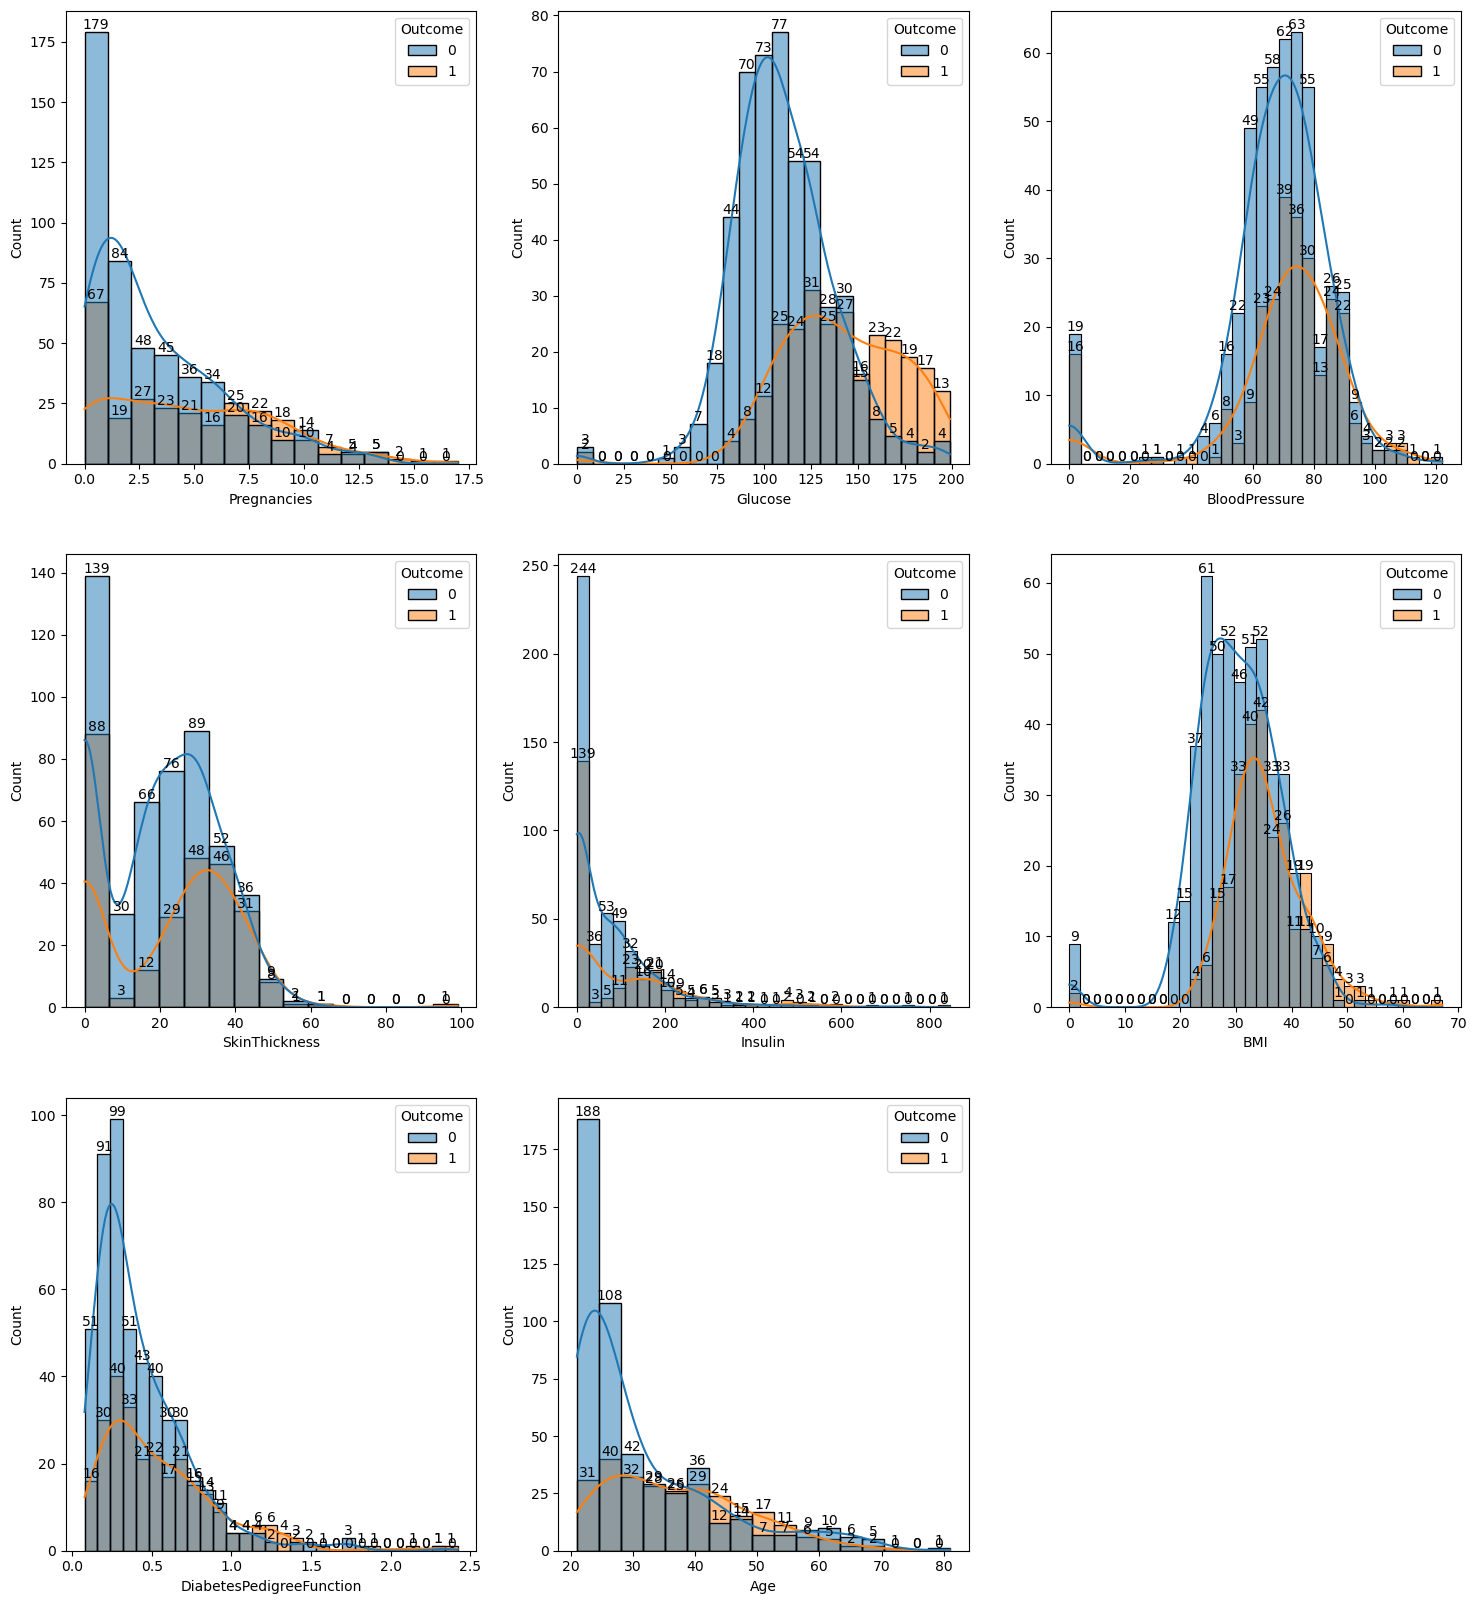

In [17]:
# Histplot of dataset - variables relation with Outcome
pno = 1
plt.figure(figsize=(18,20))
for i in data.columns:
        if pno<9:
            plt.subplot(3,3,pno)
            ax = sns.histplot(data = data , x = i , hue = data.Outcome , kde = True);
            plt.xlabel(i)
            pno+=1
            for i in ax.containers:                                                   #to set a label on top of the bars.
                ax.bar_label(i,)

# **<u>Outcome</u>:**

1. When the number of pregnancies increases the risk of diabetes also increase.
2. When the level of Glucose increase above 125 the risk of diabetes also increase.
3. Blood pressure between 60 to 90 have more diabetic people than other rate.
4. Risk of diabetes increase when skin thickness increase.
5. Insulin level affect diabetes when its level increase the risk of diabetes also increase.
6. When BMI increase above 30 the risk of diabetes also increase.
7. The histogram with kernel density overlay indicates that higher DiabetesPedigree Function values are more common among individuals with diabetes compared to those without.
8. Risk of diabetes increase when age increase.

In [18]:
correlation = data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

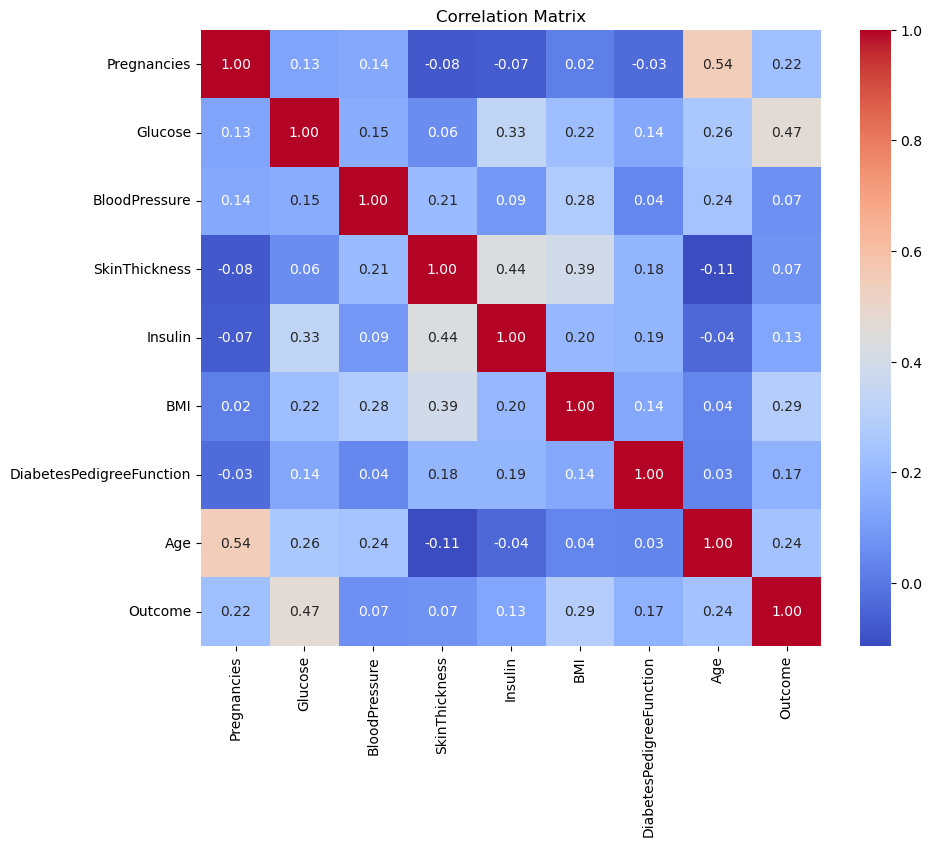

In [19]:
#Visualizing the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Observation-
* Only Age with pregnancy, and glucose with outcome show some good correlation with each other

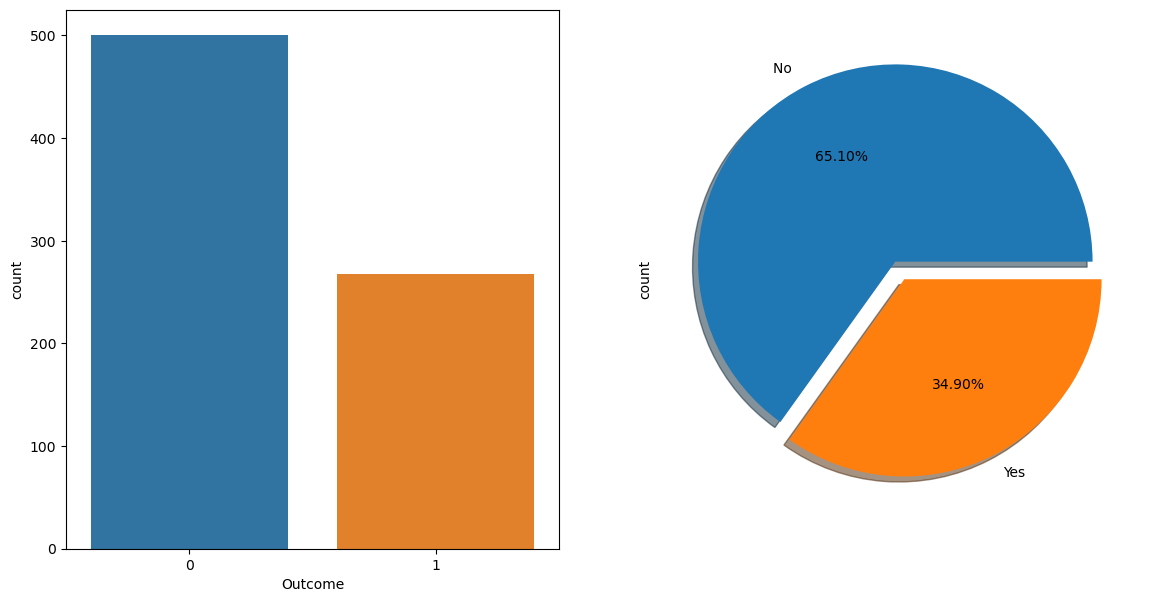

In [20]:
fig, ax = plt.subplots(1,2, figsize=(14,7))
sns.countplot(data = data, x= "Outcome", ax = ax[0])
data["Outcome"].value_counts().plot.pie(explode= [0.1,0], autopct= "%1.2F%%", labels= ["No ","Yes"], shadow= True, ax=ax[1])
plt.show()

# **Preprocessing**-

In [21]:
# Split the Data:
# Spliting the dataset into features (X) and the target variable (y).

X =data.drop("Outcome" ,axis=1)
y =data['Outcome']

In [22]:
# Splitting the dataset into a training set and a testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

In [23]:
print(y_test.shape)   # 1D Shape
print(X_test.shape)   # 2D shape
print(y_train.shape)  # 1D Shape
X_train.shape         # 2D shape

(154,)
(154, 8)
(614,)


(614, 8)

# **Linear Regression**-

In [24]:
#Train the model
model=LogisticRegression(max_iter=768)

# Fitting model
model.fit(X_train,y_train)

LogisticRegression(max_iter=768)

In [25]:
#Testing the model on remaining 20%
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [26]:
y_test

93     1
228    0
424    1
635    1
684    0
      ..
733    0
570    0
148    0
758    0
64     1
Name: Outcome, Length: 154, dtype: int64

# **Evaluation Matrix**-

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       109
           1       0.64      0.76      0.69        45

    accuracy                           0.81       154
   macro avg       0.77      0.79      0.78       154
weighted avg       0.82      0.81      0.81       154

Training Accuracy =  77.52  %
Testing Accuracy =  80.52  %


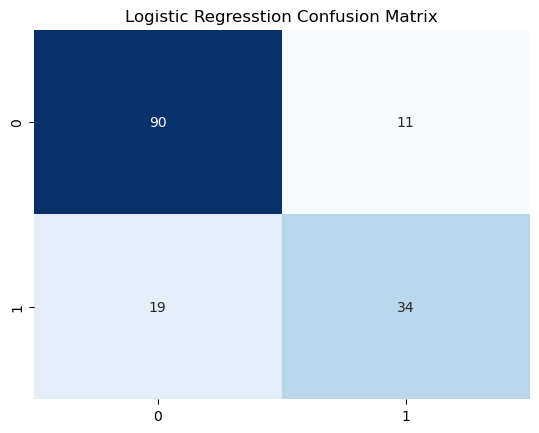

In [27]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
lr_train_acc = round(accuracy_score(y_train,model.predict(X_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print(classification_report(y_pred,y_test))
print('Training Accuracy = ' , lr_train_acc,' %')
print('Testing Accuracy = ' , lr_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)          #cbar- on right side shows the range in color bar
plt.title('Logistic Regresstion Confusion Matrix');

# **Prediction**-

In [28]:
new_data = pd.DataFrame({
    'Pregnancies': [3],
    'Glucose': [115],
    'BloodPressure': [60],
    'SkinThickness': [20],
    'Insulin': [90],
    'BMI': [23.4],
    'DiabetesPedigreeFunction': [0.25],
    'Age': [23]
})

new_predictions = model.predict(new_data)
print("Predictions for new data:", new_predictions)

Predictions for new data: [0]


# Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)


              precision    recall  f1-score   support

           0       0.87      0.82      0.85       107
           1       0.64      0.72      0.68        47

    accuracy                           0.79       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.80      0.79      0.80       154

Training Accuracy =  98.86  %
Testing Accuracy =  79.22  %


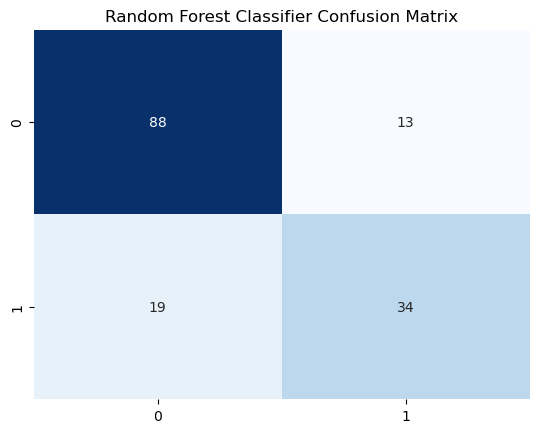

In [30]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
rf_train_acc = round(accuracy_score(y_train,rf.predict(X_train))*100,2)
rf_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print(classification_report(y_pred,y_test))
print('Training Accuracy = ' , rf_train_acc,' %')
print('Testing Accuracy = ' , rf_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)          #cbar- on right side shows the range in color bar
plt.title('Random Forest Classifier Confusion Matrix');

In [31]:
new_data = pd.DataFrame({
    'Pregnancies': [5],
    'Glucose': [190],
    'BloodPressure': [110],
    'SkinThickness': [20],
    'Insulin': [100],
    'BMI': [36.4],
    'DiabetesPedigreeFunction': [0.25],
    'Age': [29]
})

new_predictions = rf.predict(new_data)
print("Predictions for new data:", new_predictions)

Predictions for new data: [1]


# Hyper Parameter Tunning- GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV

param= {'n_estimators': [10,20,30,40,50], 'bootstrap':[True,False]}
gsc= GridSearchCV(estimator=rf,
                  param_grid=param,
                  scoring='accuracy')
gsc.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=10),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [33]:
gsc.best_params_

{'bootstrap': True, 'n_estimators': 50}

In [34]:
gsc.best_score_

0.7426629348260696

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       105
           1       0.72      0.78      0.75        49

    accuracy                           0.83       154
   macro avg       0.80      0.82      0.81       154
weighted avg       0.84      0.83      0.83       154

Training Accuracy =  100.0  %
Testing Accuracy =  83.12  %


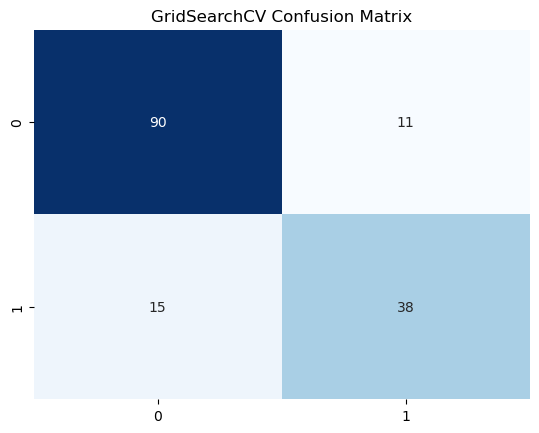

In [35]:
y_pred = gsc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
gsc_train_acc = round(accuracy_score(y_train,gsc.predict(X_train))*100,2)
gsc_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print(classification_report(y_pred,y_test))
print('Training Accuracy = ' , gsc_train_acc,' %')
print('Testing Accuracy = ' , gsc_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)          #cbar- on right side shows the range in color bar
plt.title('GridSearchCV Confusion Matrix');

In [36]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','Random Forest','HyperParamter Tunning'
    ],
    'Training Accuracy': [
        lr_train_acc,rf_train_acc,gsc_train_acc
    ],
    'Testing Accuracy': [
       lr_test_acc,rf_test_acc,gsc_test_acc
    ]
})

In [37]:
models

Model  Training Accuracy  Testing Accuracy
0    Logistic Regression              77.52             80.52
1          Random Forest              98.86             79.22
2  HyperParamter Tunning             100.00             83.12

In [38]:
models.sort_values(by=['Testing Accuracy','Training Accuracy'], ascending=False).style.background_gradient(
        cmap='coolwarm')

### Note- We can try implementing many more machine learning algorithms for the above dataset like support vector machine, decision tree, XGBoost for checking the accuracy of prediction.